# <h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 40px; color: #2D2926; text-align: center; line-height: 0.55;background-color: #E94B3C"><b>Telco Customer Churn Classification</b><br></h1>

<center>
    <img src="https://usercontent.one/wp/www.alltopeverything.com/wp-content/uploads/2021/08/telecommunications-3840285_1280.jpg?media=1659724391" alt="Telco Customer Churn" width="50%">
</center>

### **Problem Statement:**

In the telecom industry, customers are able to choose from a pool of companies to cater their needs regarding communication and internet. Customers are very critical about the kind of services they receive and judge the enitre company based on a single experience! These communication services have become so recurrent and inseparable from the daily routine that a 30 minute maintenance break kicks in anxiety in the users highlighting our taken-for-granted attitude towards these services! Coupled with high customer acquisation costs, churn analysis becomes very pivotal! Churn rate is a metric that describes the number of customers that cancelled or did not renew their subscription with the company. Thus, higher the churn rate, more customers stop buying from your business, directly affecting the revenue! Hence, based on the insights gained from the churn analysis, companies can build strategies, target segments, improve the quality of the services being provided to improve the customer experience, thus cultivating trust with the customers. That is why building predictive models and creating reports of churn analysis becomes key that paves the way for growth!

### **Objectives:**
- To classify the potential churn customers based on numerical and categorical features.
- Develop a **binary classification** model.
- Implement strategies to handle class imbalance (if it will improve model performance)
- Analyze the impact of hyperparameters on model performance.
- Incorporate preprocessing and feature engineering techniques to enhance model performance.



### **Expected Notebook Contents:**
- Exploratory Data Analysis (EDA)
- Summary of EDA
- Feature Engineering (and Selection if possible)
- Imbalance Handling
- Modeling and Hyper-Parameter Tuning.
- Experiment tracking with Mlflow.
- Conclusion



### Lets get started!


### **Dataset Attributes**
    
- **customerID** : Customer ID
- **gender** : Whether the customer is a male or a female
- **SeniorCitizen** : Whether the customer is a senior citizen or not (1, 0)
- **Partner** : Whether the customer has a partner or not (Yes, No)
- **Dependents** : Whether the customer has dependents or not (Yes, No)
- **tenure** : Number of months the customer has stayed with the company
- **PhoneService** : Whether the customer has a phone service or not (Yes, No)
- **MultipleLines** : Whether the customer has multiple lines or not (Yes, No, No phone service)
- **InternetService** : Customer’s internet service provider (DSL, Fiber optic, No)
- **OnlineSecurity** : Whether the customer has online security or not (Yes, No, No internet service)
- **OnlineBackup** : Whether the customer has online backup or not (Yes, No, No internet service)
- **DeviceProtection** : Whether the customer has device protection or not (Yes, No, No internet service)
- **TechSupport** : Whether the customer has tech support or not (Yes, No, No internet service)
- **StreamingTV** : Whether the customer has streaming TV or not (Yes, No, No internet service)
- **StreamingMovies** : Whether the customer has streaming movies or not (Yes, No, No internet service)
- **Contract** : The contract term of the customer (Month-to-month, One year, Two year)
- **PaperlessBilling** : Whether the customer has paperless billing or not (Yes, No)
- **PaymentMethod** : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- **MonthlyCharges** : The amount charged to the customer monthly
- **TotalCharges** : The total amount charged to the customer
- **Churn** : Whether the customer churned or not (Yes or No)

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv('Telco_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


*Your Analysis*

In [24]:
print(df.shape)
print(df.columns)

(7043, 21)
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [26]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [27]:
df.dropna(inplace=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.00,0.16,0.37,0.00,0.00,0.00,0.00,1.00
tenure,7032.00,32.42,24.55,1.00,9.00,29.00,55.00,72.00
MonthlyCharges,7032.00,64.80,30.09,18.25,35.59,70.35,89.86,118.75
TotalCharges,7032.00,2283.30,2266.77,18.80,401.45,1397.47,3794.74,8684.80


In [28]:
df.drop('customerID', axis=1, inplace=True)

In [29]:
num_cols = df.select_dtypes(include='number')
cat_cols = df.select_dtypes(include='object')
print(f'Numerical Columns: {num_cols.columns.tolist()}')
print(f'Categorical Columns: {cat_cols.columns.tolist()}\n')
print('\n\nUnique Values In Categorical columns:')
[f'{col}:   {cat_cols[col].unique()}' for col in cat_cols]

Numerical Columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']



Unique Values In Categorical columns:


["gender:   ['Female' 'Male']",
 "Partner:   ['Yes' 'No']",
 "Dependents:   ['No' 'Yes']",
 "PhoneService:   ['No' 'Yes']",
 "MultipleLines:   ['No phone service' 'No' 'Yes']",
 "InternetService:   ['DSL' 'Fiber optic' 'No']",
 "OnlineSecurity:   ['No' 'Yes' 'No internet service']",
 "OnlineBackup:   ['Yes' 'No' 'No internet service']",
 "DeviceProtection:   ['No' 'Yes' 'No internet service']",
 "TechSupport:   ['No' 'Yes' 'No internet service']",
 "StreamingTV:   ['No' 'Yes' 'No internet service']",
 "StreamingMovies:   ['No' 'Yes' 'No internet service']",
 "Contract:   ['Month-to-month' 'One year' 'Two year']",
 "PaperlessBilling:   ['Yes' 'No']",
 "PaymentMethod:   ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'\n 'Credit card (automatic)']",
 "Churn:   ['No' 'Yes']"]

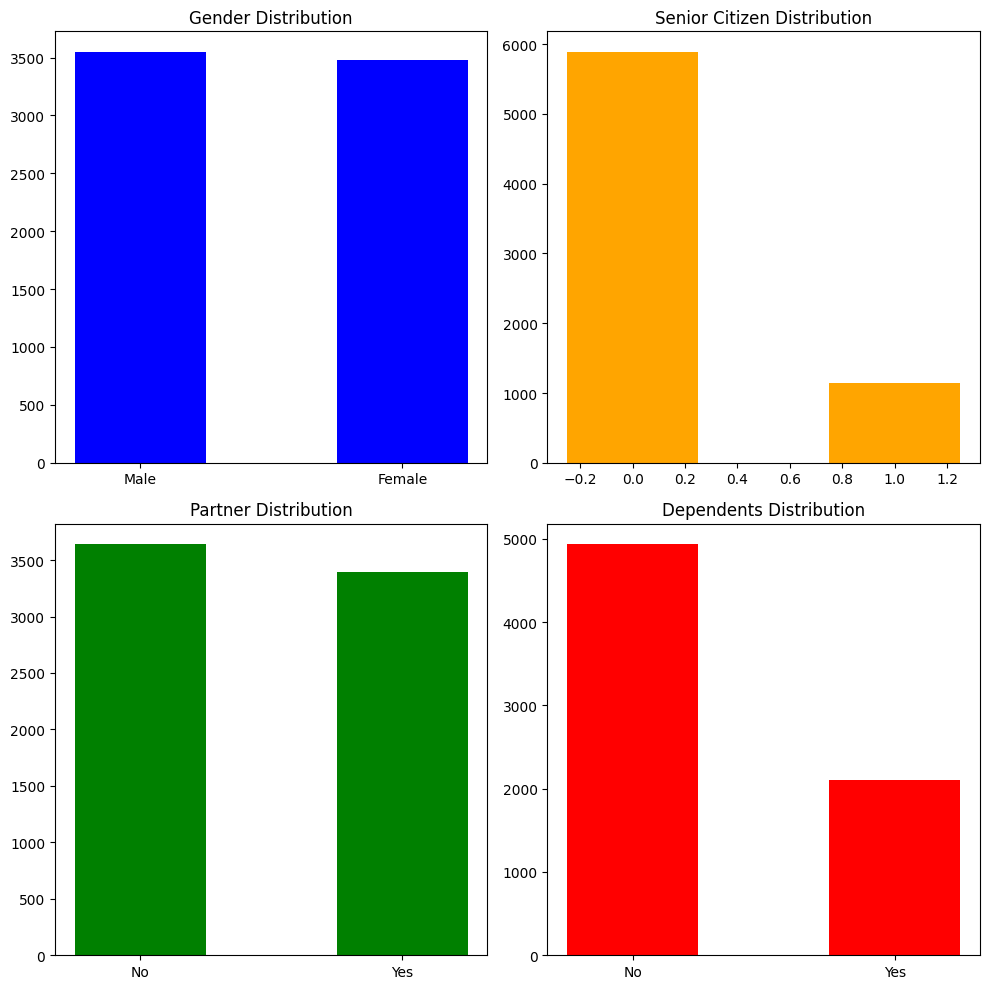

In [30]:

colors = ['blue', 'orange', 'green', 'red', 'purple']

# First set of subplots (Bar charts with multiple rows and columns)
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0, 0].bar(
    cat_cols['gender'].value_counts().index,
    cat_cols['gender'].value_counts(),
    color=colors[0],
    width=0.5
)
axes[0, 0].set_title('Gender Distribution')

axes[0, 1].bar(
    num_cols['SeniorCitizen'].value_counts().index,
    num_cols['SeniorCitizen'].value_counts(),
    color=colors[1],
    width=0.5
)
axes[0, 1].set_title('Senior Citizen Distribution')

axes[1, 0].bar(
    cat_cols['Partner'].value_counts().index,
    cat_cols['Partner'].value_counts(),
    color=colors[2],
    width=0.5
)
axes[1, 0].set_title('Partner Distribution')

axes[1, 1].bar(
    cat_cols['Dependents'].value_counts().index,
    cat_cols['Dependents'].value_counts(),
    color=colors[3],
    width=0.5
)
axes[1, 1].set_title('Dependents Distribution')

plt.tight_layout()
plt.show()

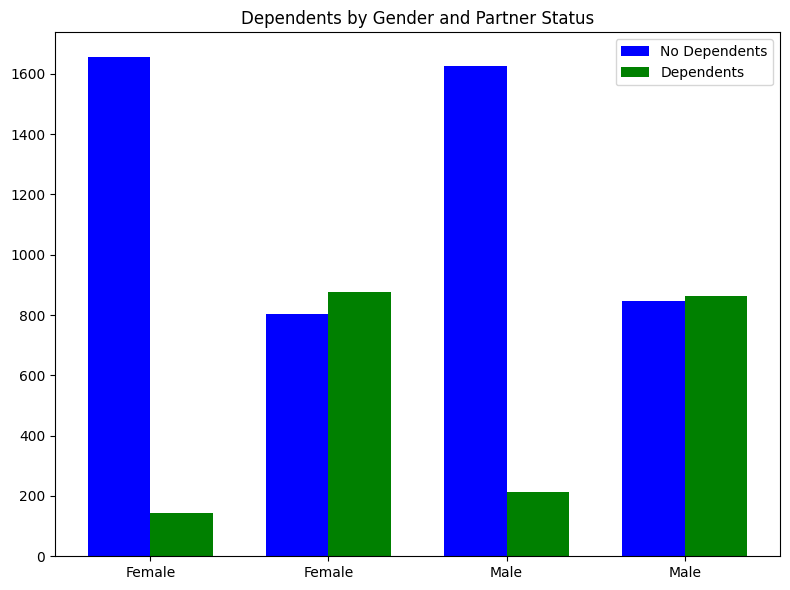

In [31]:
c = pd.get_dummies(
    data=cat_cols[['gender', 'Partner', 'Dependents']],
    columns=['Dependents']
).groupby(['gender', 'Partner']).sum().reset_index()

fig, ax = plt.subplots(figsize=(8, 6))
x = np.arange(len(c['gender']))  # X-axis positions
width = 0.35

ax.bar(x - width / 2, c['Dependents_No'], width, label='No Dependents', color=colors[0])
ax.bar(x + width / 2, c['Dependents_Yes'], width, label='Dependents', color=colors[2])

ax.set_xticks(x)
ax.set_xticklabels(c['gender'])
ax.set_title('Dependents by Gender and Partner Status')
ax.legend()

plt.tight_layout()
plt.show()

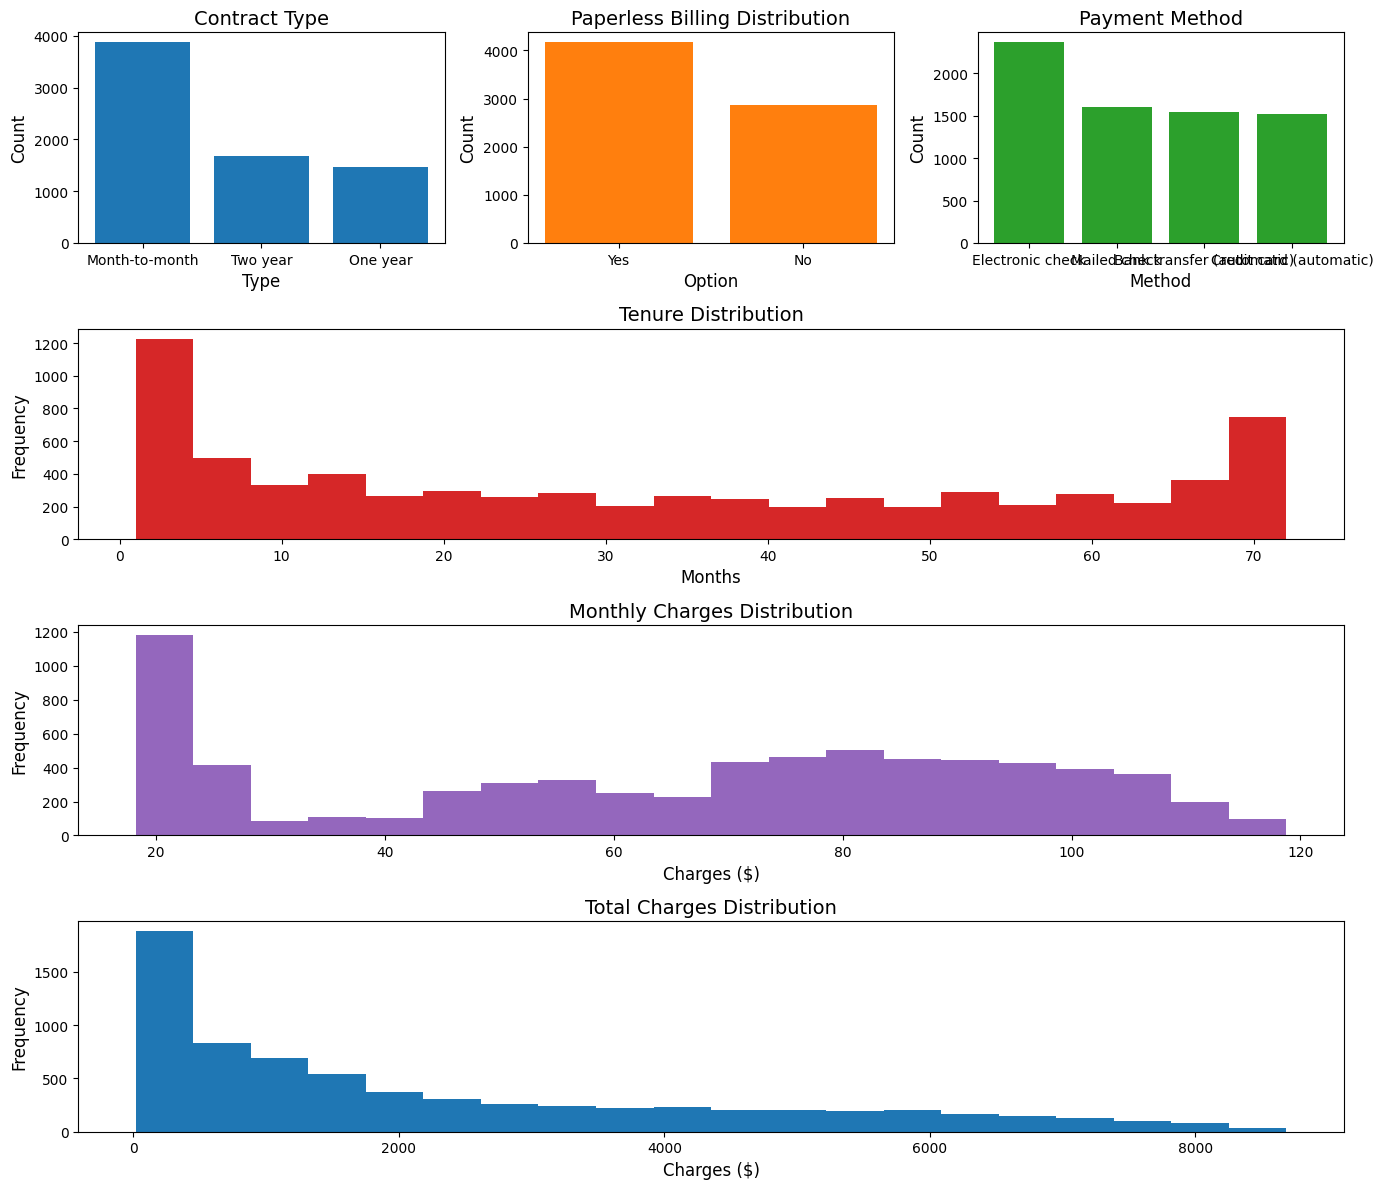

In [32]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

# Example data
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']


# Create a figure with gridspec
fig = plt.figure(figsize=(14, 12))
gs = gridspec.GridSpec(4, 3, height_ratios=[1.5, 1.5, 1.5,1.5])

# Contract Type
ax1 = fig.add_subplot(gs[0, 0])
ax1.bar(cat_cols['Contract'].value_counts().index, cat_cols['Contract'].value_counts(), color=colors[0])
ax1.set_title("Contract Type", fontsize=14)
ax1.set_xlabel("Type", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)

# Paperless Billing
ax2 = fig.add_subplot(gs[0, 1])
ax2.bar(cat_cols['PaperlessBilling'].value_counts().index, cat_cols['PaperlessBilling'].value_counts(), color=colors[1])
ax2.set_title("Paperless Billing Distribution", fontsize=14)
ax2.set_xlabel("Option", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)

# Payment Method
ax3 = fig.add_subplot(gs[0, 2])
ax3.bar(cat_cols['PaymentMethod'].value_counts().index, cat_cols['PaymentMethod'].value_counts(), color=colors[2])
ax3.set_title("Payment Method", fontsize=14)
ax3.set_xlabel("Method", fontsize=12)
ax3.set_ylabel("Count", fontsize=12)

# Tenure Distribution
ax4 = fig.add_subplot(gs[1, :])
ax4.hist(num_cols['tenure'], bins=20, color=colors[3])
ax4.set_title("Tenure Distribution", fontsize=14)
ax4.set_xlabel("Months", fontsize=12)
ax4.set_ylabel("Frequency", fontsize=12)

# Monthly Charges
ax5 = fig.add_subplot(gs[2, :])
ax5.hist(num_cols['MonthlyCharges'], bins=20, color=colors[4])
ax5.set_title("Monthly Charges Distribution", fontsize=14)
ax5.set_xlabel("Charges ($)", fontsize=12)
ax5.set_ylabel("Frequency", fontsize=12)

# Total Charges
ax6 = fig.add_subplot(gs[3, :])
ax6.hist(num_cols['TotalCharges'], bins=20, color=colors[0])
ax6.set_title("Total Charges Distribution", fontsize=14)
ax6.set_xlabel("Charges ($)", fontsize=12)
ax6.set_ylabel("Frequency", fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


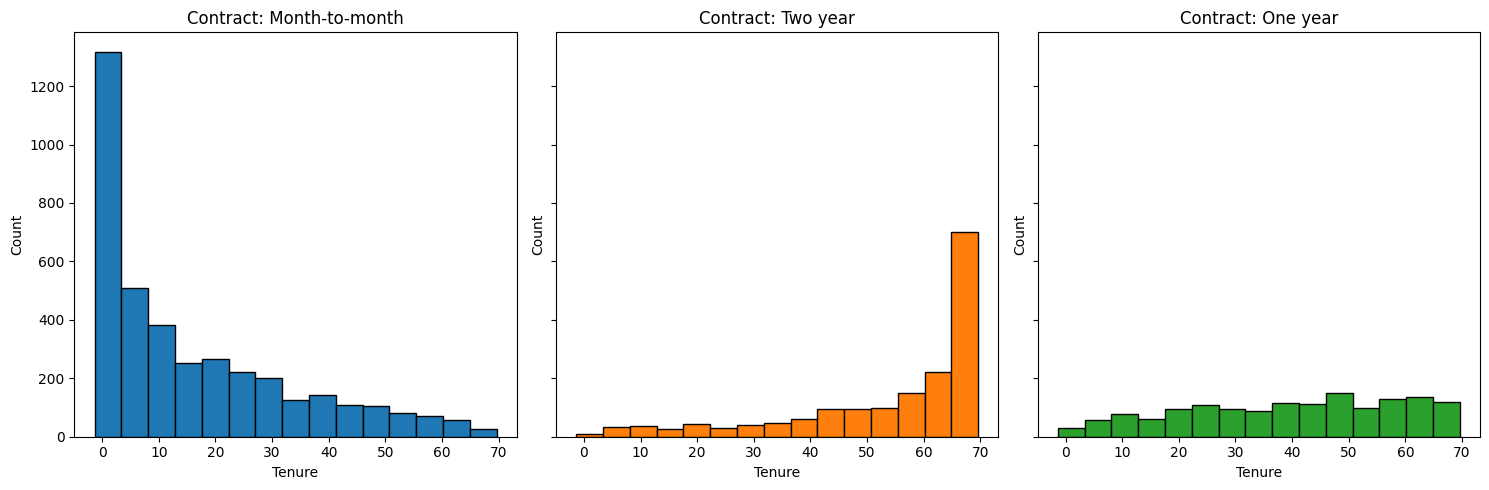

In [33]:
contracts = df['Contract'].unique()

# Set up the subplots
fig, axes = plt.subplots(1, len(contracts), figsize=(15, 5), sharey=True)

# Function to plot the histogram more efficiently
def plot_histogram(ax, data, color, title):
    counts, bins = np.histogram(data, bins=15)
    ax.bar(bins[:-1], counts, width=np.diff(bins), color=color, edgecolor="black")
    ax.set_title(title)
    ax.set_xlabel("Tenure")
    ax.set_ylabel("Count")

# Histogram for 'Month-to-month'
plot_histogram(axes[0], df[df['Contract'] == 'Month-to-month']['tenure'], colors[0], "Contract: Month-to-month")

# Histogram for 'Two year'
plot_histogram(axes[1], df[df['Contract'] == 'Two year']['tenure'], colors[1], "Contract: Two year")

# Histogram for 'One year'
plot_histogram(axes[2], df[df['Contract'] == 'One year']['tenure'], colors[2], "Contract: One year")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

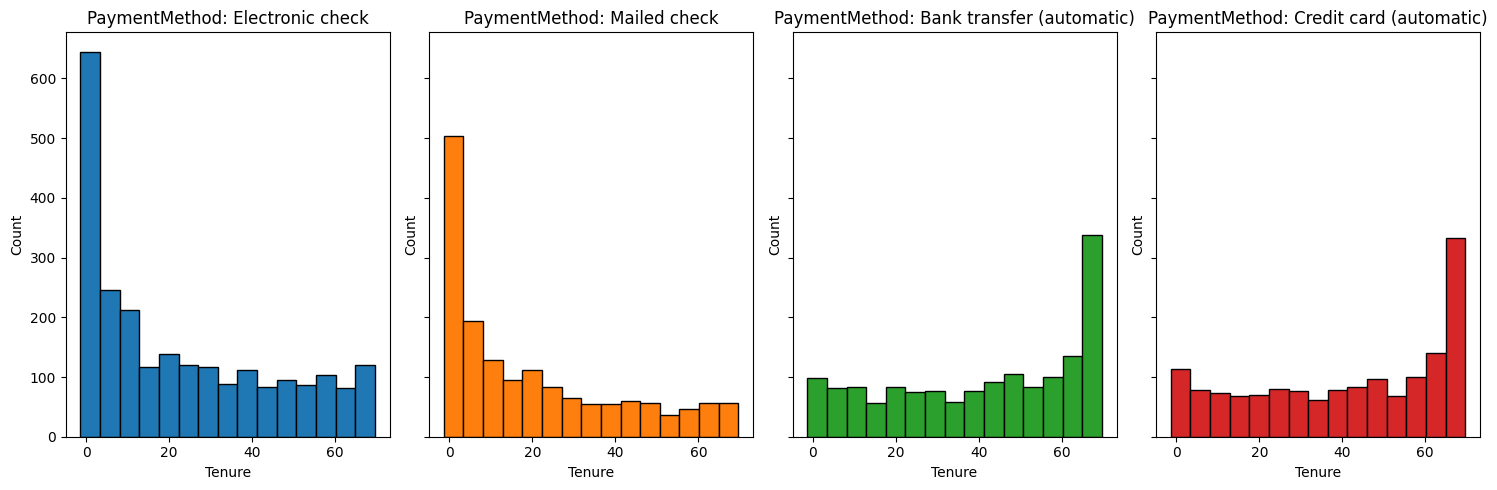

In [34]:
payment_methods = df['PaymentMethod'].unique()

# Set up the subplots
fig, axes = plt.subplots(1, len(payment_methods), figsize=(15, 5), sharey=True)

# Function to plot the histogram more efficiently
def plot_histogram(ax, data, color, title):
    counts, bins = np.histogram(data, bins=15)
    ax.bar(bins[:-1], counts, width=np.diff(bins), color=color, edgecolor="black")
    ax.set_title(title)
    ax.set_xlabel("Tenure")
    ax.set_ylabel("Count")

# Loop through each PaymentMethod and plot
for i, method in enumerate(payment_methods):
    plot_histogram(axes[i], df[df['PaymentMethod'] == method]['tenure'], colors[i], f"PaymentMethod: {method}")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

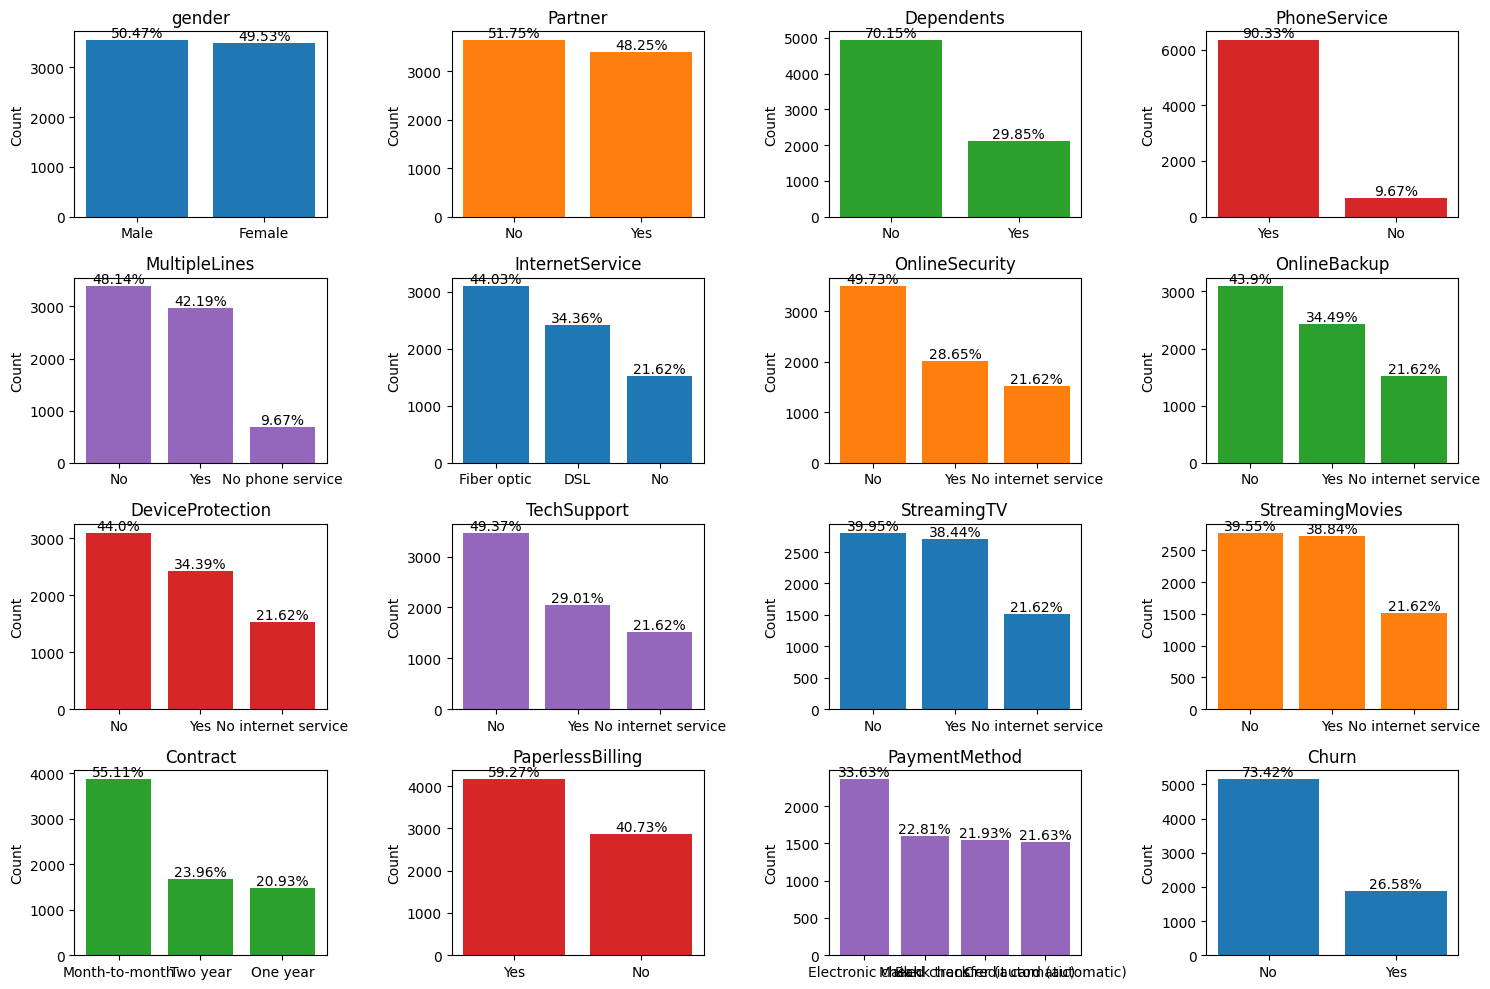

In [35]:
fig, axes = plt.subplots(4, 4, figsize=(15, 10))

# Flatten axes for easier iteration
axes = axes.flatten()

# Function to plot bar chart with percentage labels
def plot_bar_chart(ax, column, color):
    value_counts = cat_cols[column].value_counts()
    percentages = (value_counts * 100 / len(cat_cols)).round(2)
    
    bars = ax.bar(value_counts.index, value_counts, color=color)
    
    # Add percentage labels
    for bar, percent in zip(bars, percentages):
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{percent}%', ha='center', va='bottom')

    ax.set_title(f'{column}')
    ax.set_ylabel('Count')

# Plot each categorical column
for i, column in enumerate(cat_cols):
    color = colors[i % len(colors)]  # Rotate through colors
    plot_bar_chart(axes[i], column, color)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

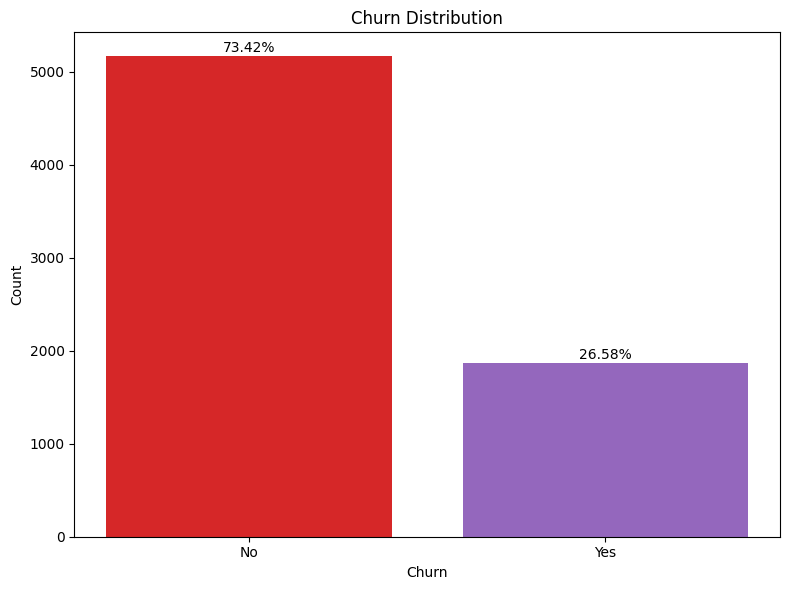

In [36]:
churn_counts = df['Churn'].value_counts()
percentages = (churn_counts * 100 / df.shape[0]).round(2)

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(churn_counts.index, churn_counts, color=colors[3:])

# Add percentage labels above the bars
for bar, percent in zip(bars, percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 10, f'{percent}%', ha='center', va='bottom')

# Set titles and labels
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [37]:
do_dummy_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod']
model_df = df.copy()
model_df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
model_df['Churn'].replace(to_replace='No',  value=0, inplace=True)
model_df = pd.get_dummies(model_df, columns=do_dummy_cols)
model_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,False,True,False,True,False,...,True,False,True,False,False,True,False,False,False,True
7039,0,72,103.20,7362.90,0,True,False,False,True,False,...,True,False,True,False,False,True,False,True,False,False
7040,0,11,29.60,346.45,0,True,False,False,True,False,...,False,True,False,False,False,True,False,False,True,False
7041,1,4,74.40,306.60,1,False,True,False,True,True,...,False,True,False,False,False,True,False,False,False,True


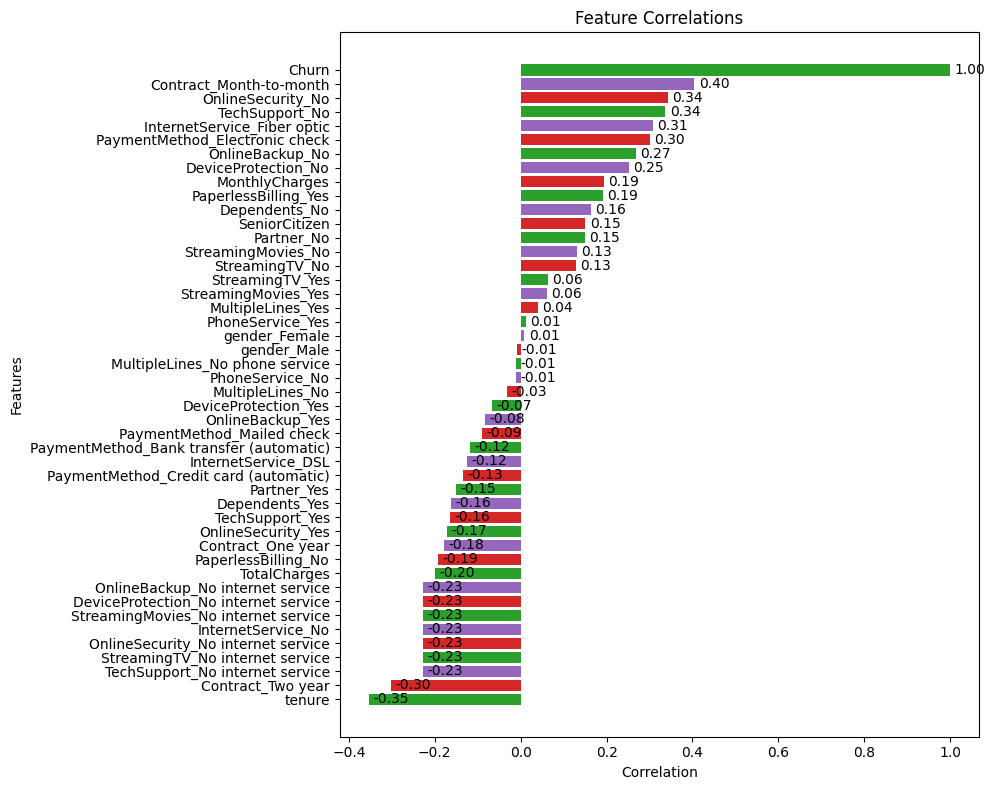

In [38]:
feature_corr = model_df.corr()['Churn'].sort_values(ascending=False)
sorted_corr = feature_corr.sort_values(ascending=True)

# Create the horizontal bar chart
plt.figure(figsize=(10, 8))
bars = plt.barh(sorted_corr.index, sorted_corr, color=colors[2:])

# Add correlation values next to each bar
for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}', va='center', ha='left')

# Set titles and labels
plt.title('Feature Correlations')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
encoded_data=df.copy()
binary_cols = ["Partner", "Dependents", "PhoneService", "OnlineSecurity", "OnlineBackup", 
               "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", 
               "PaperlessBilling", "Churn"]



categorical_cols = ["InternetService", "Contract", "PaymentMethod", "MultipleLines"]
encoded_data = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
encoded_data = encoded_data.astype({col: int for col in encoded_data.columns if encoded_data[col].dtype == 'bool'})

for col in binary_cols:
    encoded_data[col] = encoded_data[col].apply(lambda x: 1 if x == "Yes" else 0)

encoded_data['gender'] = encoded_data['gender'].apply(lambda x: 1 if x == "Male" else 0)

encoded_data.to_csv("telco_data_encoded.csv", index=False)